## Optimal Aircraft Selection for Low-Risk, High-Return Aviation Operations

### Project goal

This project is from https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses and is about an analysis of Aircraft accidents from the year 1962 to 2023.This project aims at finding the Lowest Risk Aircraft for purchase by answering the following questions:

1.Which Aircraft has the lowest risk for the company?

2.Which Aircraft has the highest number of accidents?

3.Which location had the highest number of accidents?

4.Which state had the highest number of incidents?

### Business Understanding

This project highlights a problem that has been a menace for many years.Many lives have been lost through plane crashes and there are many reasons behind this.This directly impacts the Aircraft business and for an organization intending to invest in this business.A good background check and analysis must be done to ensure the safety,maintenance cost as well as operational cost of running such a business.This is the main purpose of doing this research so as to find the Lowest-Risk Aircraft for purchase for both personal and commercial use.

### Data Understanding

I used 17 columns for my analysis which included variables about:

The total number of injuries caused by various aircrafts

The various types of Aircrafts

The location of the Aircraft accidents

The weather patterns for when the accidents happened

In [155]:
#To begin the analysis, I had to import all the necessary libaries that will be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
#I had to load and read the dataset that I would use for analysis.
df= pd.read_csv("AviationData.csv ",encoding='ISO-8859-1',low_memory=False)#I used the encoding and low-memory to ensure the data is downloaded in the right format 

Prior to working on any form of data.It is required to have an overview of the data and familiarize with the data in context so as to do the right analysis

In [157]:
# I run this code to get an overview of the data i intended to work with
df.head()#This code gives an output of the first 5 rows and all the columns

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [158]:
#This was to see the consistent flow of data
df.tail()#This code gives the last 5rows of the data including all the columns

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [159]:
#I checked the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [160]:
df2=df.copy(deep=True)

In [161]:
df2.shape

(88889, 31)

### Handling missing data

For acurate analysis of data ,It is important to work with the correct data.Missing values and null values can bring a lot of inaccuracy when doing analysis and hinder the making of informed decisions.It is therefore necessary to find columns with missing data,duplicated data as well as deleting columns that may not be helpful in analysis

In [162]:
# This code gives me a total sum of all the missing data in every column
df2.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [163]:
#I ran this code to identify all the columns 
df2.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [164]:
#From this I was able to identify all the null values within the data before i did the data cleaning.
#from the output we can see that there is a lot of data missing in our columns
print(df2.isna().sum())

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [165]:
# I ran this code to change all the column names to lowercase for ease of identification
df2.columns= df2.columns.str.lower()

In [166]:
df2.columns # This was to confirm all the columns were now in lower case

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')

In [167]:
df2.duplicated().sum() # This was to identify any duplicated columns and from the output ,there was no duplicated column

0

In [168]:
columns_to_drop =['event.id','broad.phase.of.flight','accident.number','schedule','amateur.built', 'report.status','publication.date']
df2_clean= df2.drop(columns = columns_to_drop, inplace=True)

In [169]:
df2.columns # I checked the columns to ensure i had dropped the selected columns

Index(['investigation.type', 'event.date', 'location', 'country', 'latitude',
       'longitude', 'airport.code', 'airport.name', 'injury.severity',
       'aircraft.damage', 'aircraft.category', 'registration.number', 'make',
       'model', 'number.of.engines', 'engine.type', 'far.description',
       'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition'],
      dtype='object')

### Data Cleaning

After identifiying all the missing data in the columns, I had to find a way to deal with the columns so as to work with consistent data

In [170]:
#I dropped columns whose missing values were more than 50% and were also not vital for my analysis
columns_to_drop =['investigation.type','aircraft.damage','registration.number','far.description','air.carrier','airport.code']
df2_clean= df2.drop(columns = columns_to_drop, inplace=True)

In [171]:
# Considering i could use Location i decided to drop both the longitude and latitude columns
columns_to_drop =['longitude','latitude']
df2_clean= df2.drop(columns = columns_to_drop, inplace=True)

In [172]:
# the data still had a lot of missing data that needed to be sorted
print(df2.isnull().sum())

event.date                    0
location                     52
country                     226
airport.name              36185
injury.severity            1000
aircraft.category         56602
make                         63
model                        92
number.of.engines          6084
engine.type                7096
purpose.of.flight          6192
total.fatal.injuries      11401
total.serious.injuries    12510
total.minor.injuries      11933
total.uninjured            5912
weather.condition          4492
dtype: int64


Since the data had various categorical columns,they had to be handled differently

In [173]:
# For this column, i fiiled the missing values with Unkown
df2['Weather.Condition']=df2['weather.condition'].fillna('Unkown')

In [174]:
# For this column, i fiiled the missing values with Unkown
df2['weather.condition']=df2['weather.condition'].fillna('Unkown')

For the model and the make ,I used the mode value ,which is the most appearing to fill all the other missing values

In [175]:
make_mode=(df2["make"].mode()[0])
df2['make']=df2['make'].fillna(make_mode)


In [176]:
model_mode=(df2["model"].mode()[0])
df2['model']=df2['model'].fillna(model_mode)


In [177]:
print(df2.isnull().sum())# from this i could tell that the make ,model and weather condition columns no longer had missing values

event.date                    0
location                     52
country                     226
airport.name              36185
injury.severity            1000
aircraft.category         56602
make                          0
model                         0
number.of.engines          6084
engine.type                7096
purpose.of.flight          6192
total.fatal.injuries      11401
total.serious.injuries    12510
total.minor.injuries      11933
total.uninjured            5912
weather.condition             0
Weather.Condition             0
dtype: int64


In [178]:
# Considering location,country ,airport name and injury severity  were also categorical columns ,i used the mode value to fill the missing values
df2['location'] = df2['location'].fillna(df2['location'].mode()[0])
df2['country'] = df2['country'].fillna(df2['country'].mode()[0])
df2['airport.name'] = df2['airport.name'].fillna(df2['airport.name'].mode()[0])
df2['injury.severity'] = df2['injury.severity'].fillna(df2['injury.severity'].mode()[0])


for the following numerical columns ,i used the median value to fill the missing values

In [179]:

df2['total.fatal.injuries'] = df2['total.fatal.injuries'].fillna(df2['total.fatal.injuries'].median())
df2['total.serious.injuries'] = df2['total.serious.injuries'].fillna(df2['total.serious.injuries'].median())
df2['total.minor.injuries'] = df2['total.minor.injuries'].fillna(df2['total.minor.injuries'].median())
df2['total.uninjured'] = df2['total.uninjured'].fillna(df2['total.uninjured'].median())

In [180]:
print(df2.isnull().sum())# I checked to see if there were any more columns with missing values

event.date                    0
location                      0
country                       0
airport.name                  0
injury.severity               0
aircraft.category         56602
make                          0
model                         0
number.of.engines          6084
engine.type                7096
purpose.of.flight          6192
total.fatal.injuries          0
total.serious.injuries        0
total.minor.injuries          0
total.uninjured               0
weather.condition             0
Weather.Condition             0
dtype: int64


In [181]:
#Having seen i had more categorical columns, I used the modal value to fill the missing columns
df2['aircraft.category'] = df2['aircraft.category'].fillna(df2['aircraft.category'].mode()[0])
df2['engine.type'] = df2['engine.type'].fillna(df2['engine.type'].mode()[0])
df2['purpose.of.flight'] = df2['purpose.of.flight'].fillna(df2['purpose.of.flight'].mode()[0])

In [182]:
print(df2.isnull().sum()) # only the number of engines had missing values

event.date                   0
location                     0
country                      0
airport.name                 0
injury.severity              0
aircraft.category            0
make                         0
model                        0
number.of.engines         6084
engine.type                  0
purpose.of.flight            0
total.fatal.injuries         0
total.serious.injuries       0
total.minor.injuries         0
total.uninjured              0
weather.condition            0
Weather.Condition            0
dtype: int64


In [183]:
# I ran this code to fill the missing values with the median
df2['number.of.engines'] = df2['number.of.engines'].fillna(df2['number.of.engines'].median())

In [184]:
print(df2.isnull().sum()) # I did a final check and all of the missing values in the columns had been filled

event.date                0
location                  0
country                   0
airport.name              0
injury.severity           0
aircraft.category         0
make                      0
model                     0
number.of.engines         0
engine.type               0
purpose.of.flight         0
total.fatal.injuries      0
total.serious.injuries    0
total.minor.injuries      0
total.uninjured           0
weather.condition         0
Weather.Condition         0
dtype: int64


In [185]:
# i saved the cleaned data to a new file for ease of Analysis without tempering with the original data
df2.to_csv("AviationData_clean.csv",index= False)

In [186]:
# Having two columns with similar names, i decided to delete one 
del df2["Weather.Condition"]

### Exploratory Data Analysis

Now, to the analysis of the data ,i had to load and read the clean data for Analysis

In [187]:
# I ran this code, to open and read the cleaned file
data=pd.read_csv("AviationData_clean.csv")
data.head()

,event.date,location,country,airport.name,injury.severity,aircraft.category,make,model,number.of.engines,engine.type,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,Weather.Condition
0,1948-10-24,"MOOSE CREEK, ID",United States,Private,Fatal(2),Airplane,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,UNK
1,1962-07-19,"BRIDGEPORT, CA",United States,Private,Fatal(4),Airplane,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,UNK
2,1974-08-30,"Saltville, VA",United States,Private,Fatal(3),Airplane,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,IMC
3,1977-06-19,"EUREKA, CA",United States,Private,Fatal(2),Airplane,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,IMC
4,1979-08-02,"Canton, OH",United States,Private,Fatal(1),Airplane,Cessna,501,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,VMC


In [188]:
data.isna().sum() # i confirmed that there were missing values

event.date                0
location                  0
country                   0
airport.name              0
injury.severity           0
aircraft.category         0
make                      0
model                     0
number.of.engines         0
engine.type               0
purpose.of.flight         0
total.fatal.injuries      0
total.serious.injuries    0
total.minor.injuries      0
total.uninjured           0
weather.condition         0
Weather.Condition         0
dtype: int64

In [189]:
data.drop(columns=['Weather.Condition'], inplace=True)

### Univariate Analysis

In [190]:
top_5_aircraft_category_count=data["aircraft.category"].value_counts().head(5)
top_5_aircraft_category_count

aircraft.category
Airplane      84219
Helicopter     3440
Glider          508
Balloon         231
Gyrocraft       173
Name: count, dtype: int64

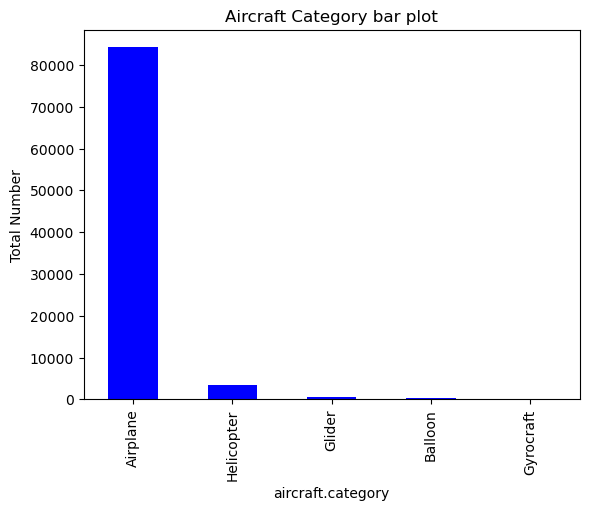

In [191]:
 # Aircraft category distribution
top_5_aircraft_category_count.plot(kind='bar',color='blue')
plt.title('Aircraft Category bar plot')
plt.ylabel("Total Number")
plt.show()

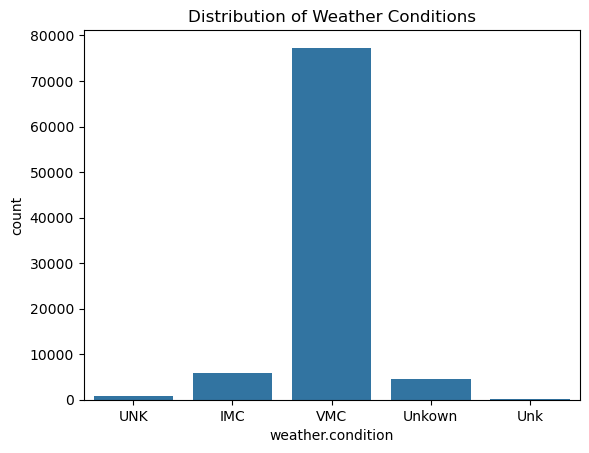

In [192]:
# This code gives a distribution of weather conditions
sns.countplot(x='weather.condition', data=data) # from this we can see the VMC weather condition had the highest frequency
plt.title('Distribution of Weather Conditions')
plt.show()

### Bivariate Analysis

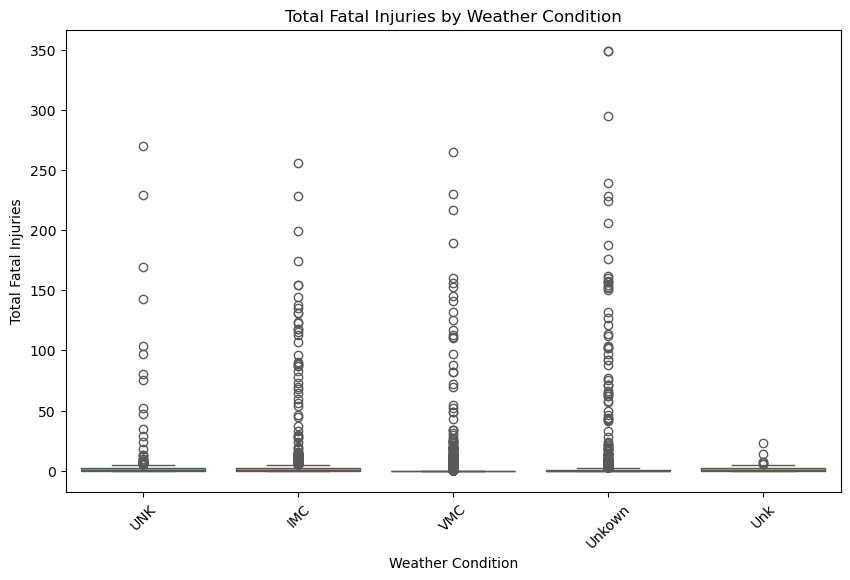

In [193]:
#In finding out the relationship between the Weather condition and the total Fatal injuries ,i used a box plot as it is able to give the skwenness of the data ,as well as identify outliers in the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather.condition', y='total.fatal.injuries', data=data, hue='weather.condition', palette='Set2', legend=False)
plt.title('Total Fatal Injuries by Weather Condition')
plt.xticks(rotation=45)
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.show()



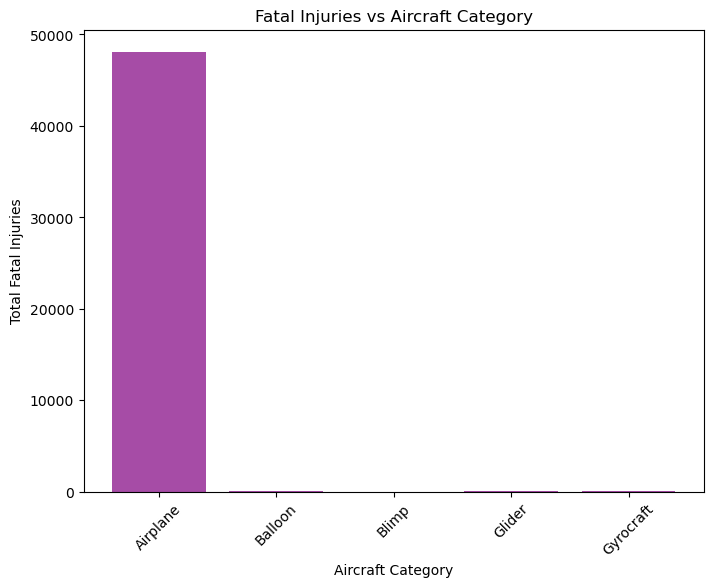

In [194]:

# Group by aircraft category and sum the fatal injuries
category_injury_data = data.groupby('aircraft.category').agg({'total.fatal.injuries': 'sum'}).head(5)

# Plot the bar plot between the top 5 categories and their fatal injuries
plt.figure(figsize=(8, 6))
plt.bar(category_injury_data.index, category_injury_data['total.fatal.injuries'], alpha=0.7, color='purple')
plt.title('Fatal Injuries vs Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()



Among the Aircrafts used, the Airplane seems to be used more compared to the rest

### Multivariate analysis

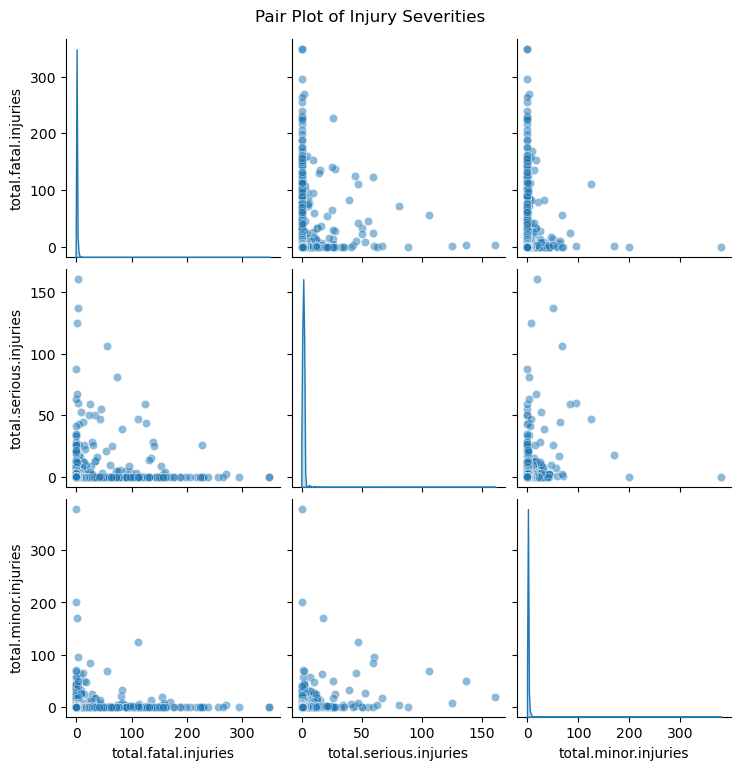

In [195]:
import seaborn as sns
# For multivariate Analysis ,i used the pair plot to know the distribution of numerical columns
columns = ['total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries']
sns.pairplot(data[columns], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Injury Severities', y=1.02)
plt.show()


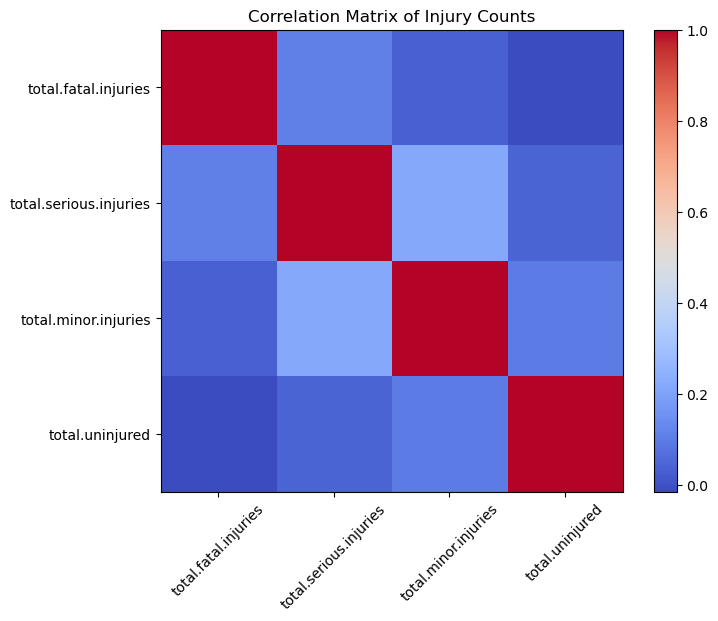

In [196]:
# i checked the correlation betweeen the various levels of injuries using a correlation matrix
corr_matrix = data[['total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured']].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix of Injury Counts')
plt.xticks(np.arange(4), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(4), corr_matrix.columns)
plt.show()

 From the data an increase in fatal injuries correlates with more serious injuries